In [1]:
import numpy as np
import matplotlib.pyplot as plt
import numpy.linalg as la
import numpy.random as rd
import cmath as cm
import copy
import os
import warnings
cwd = os.getcwd()
import seaborn as sns
sns.set_palette("Blues_r")
sns.set_style("white")
from matplotlib import rcParams
rcParams['font.family'] = 'sans-serif'
rcParams['font.sans-serif'] = ['Arial']

In [3]:
conds = np.loadtxt("conds.txt")

fit = np.polyfit(np.arange(16), np.log(conds), 1, cov=True)
fit_fn = np.poly1d(fit[0]) 
sig = fit[1][1, 1]
err = abs( ( np.log(conds) - fit_fn( np.arange(conds.size)  ) )  / np.sqrt(sig) )

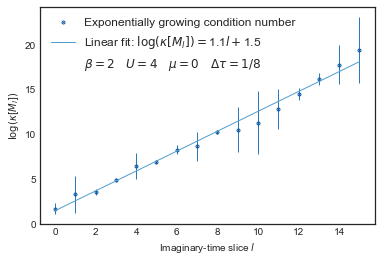

In [9]:
sns.set_style("white")
from matplotlib import rcParams
rcParams['font.family'] = 'sans-serif'
rcParams['font.sans-serif'] = ['Arial']
plt.plot(np.arange(conds.size), np.log(conds),\
         linewidth = 0, marker = 'o', markersize = 1, markeredgewidth = 3, label = 'Exponentially growing condition number')
plt.errorbar(np.arange(conds.size), np.log(conds),yerr=err, linewidth = 0, elinewidth =1, barsabove=True)
plt.plot(np.arange(conds.size), fit_fn(np.arange(conds.size)),\
         linewidth = 1, label =r'Linear fit: $\log (\kappa[M_l]) = $' + f'{fit[0][0]:.1f}'\
         + r'$l +$' + f'{fit[0][1]:.1f}')
plt.ylabel(r'$ \log (\kappa[M_l])$')
plt.xlabel(r'Imaginary-time slice $l$')
plt.plot([], [], label=r'$\beta = 2 \quad U = 4 \quad \mu = 0 \quad \Delta \tau = 1 / 8 $', linewidth = 0)
plt.legend(loc=2, fontsize=12)
plt.savefig("conditionNumberNaive.png", dpi = 600)

In [23]:
fit_fn(np.arange(conds.size))

array([  1.46273465,   2.5718361 ,   3.68093755,   4.790039  ,
         5.89914044,   7.00824189,   8.11734334,   9.22644479,
        10.33554624,  11.44464769,  12.55374913,  13.66285058,
        14.77195203,  15.88105348,  16.99015493,  18.09925638])

In [54]:
sig = fit[1][1, 1]

err = abs( ( np.log(conds) - fit_fn( np.arange(conds.size)  ) )  / np.sqrt(sig) )
err

array([ 0.64949577,  2.06326616,  0.35453238,  0.21330673,  1.45544552,
        0.21771262,  0.47692868,  1.59945314,  0.24826928,  2.52658901,
        3.51333688,  2.22494647,  0.68737357,  0.68001465,  2.15755051,
        3.67620532])

In [45]:
sig

0.13330386605919003

In [21]:
M = np.loadtxt("hubbMat.txt")
eigM = la.eigvals(M)
eigsPolar = np.zeros((eigM.size, 2))
for i in range(eigM.size):
    eigsPolar[i, :] = cm.polar(eigM[i])

Text(0.5,1,'Eigenvalues of the 1D Hubbard Matrix at U = 0')

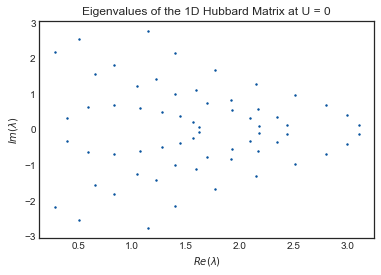

In [11]:
plt.scatter(eigsPolar[:, 0], eigsPolar[:, 1], s = 2)
plt.xlabel(r'$Re(\lambda)$')
plt.ylabel(r'$Im(\lambda)$')
plt.title("Eigenvalues of the 1D Hubbard Matrix")

Text(0.5,1,'Eigenvalues of the 1D Hubbard Matrix at U = 4')

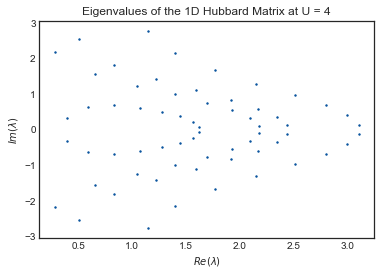

In [12]:
plt.scatter(eigsPolar[:, 0], eigsPolar[:, 1], s = 2)
plt.xlabel(r'$Re(\lambda)$')
plt.ylabel(r'$Im(\lambda)$')
plt.title("Eigenvalues of the 1D Hubbard Matrix at U = 4")